# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [7]:
data=pd.read_csv("breast-cancer-wisconsin.data.txt",\
                 names=['ID','Clump_Thinkness','Cell_Size','Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Normal_Nuclei','Bland_Chromatin','Mitoses','Class'])

In [8]:
data.head(10)

,ID,Clump_Thinkness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nuclei,Bland_Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [12]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
data.drop('ID',axis=1,inplace=True)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [13]:
data.shape

(699, 10)

In [14]:
data.dtypes

Clump_Thinkness                 int64
Cell_Size                       int64
Cell_Shape                      int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Normal_Nuclei                   int64
Bland_Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

<b>All variables have numeric data type except Bare Nucliei.

In [18]:
#Convert Bare Nuclei to numeric type and convert non numeric values to NaN
data['Bare_Nuclei']=pd.to_numeric(data['Bare_Nuclei'],errors='coerce')
data.dtypes

Clump_Thinkness                  int64
Cell_Size                        int64
Cell_Shape                       int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Normal_Nuclei                    int64
Bland_Chromatin                  int64
Mitoses                          int64
Class                            int64
dtype: object

<b>All data types are numeric

In [19]:
data.describe()

,Clump_Thinkness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nuclei,Bland_Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [25]:
# Check for missing value in any other column
data.isna().sum()

Clump_Thinkness                 0
Cell_Size                       0
Cell_Shape                      0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Normal_Nuclei                   0
Bland_Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

<b>There are 16 missing values in Bare_Nuclei

In [40]:
#impute missing values with mode
data['Bare_Nuclei'].fillna(data['Bare_Nuclei'].mode(),inplace=True)

In [41]:
data.isna().sum()

Clump_Thinkness                0
Cell_Size                      0
Cell_Shape                     0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Normal_Nuclei                  0
Bland_Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

<b>Now there are no missing values. 

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [42]:
# Check for correlation of variable
data.corr()

,Clump_Thinkness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nuclei,Bland_Chromatin,Mitoses,Class
Clump_Thinkness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal_Nuclei,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland_Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\Shreyaspatil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Shreyaspatil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


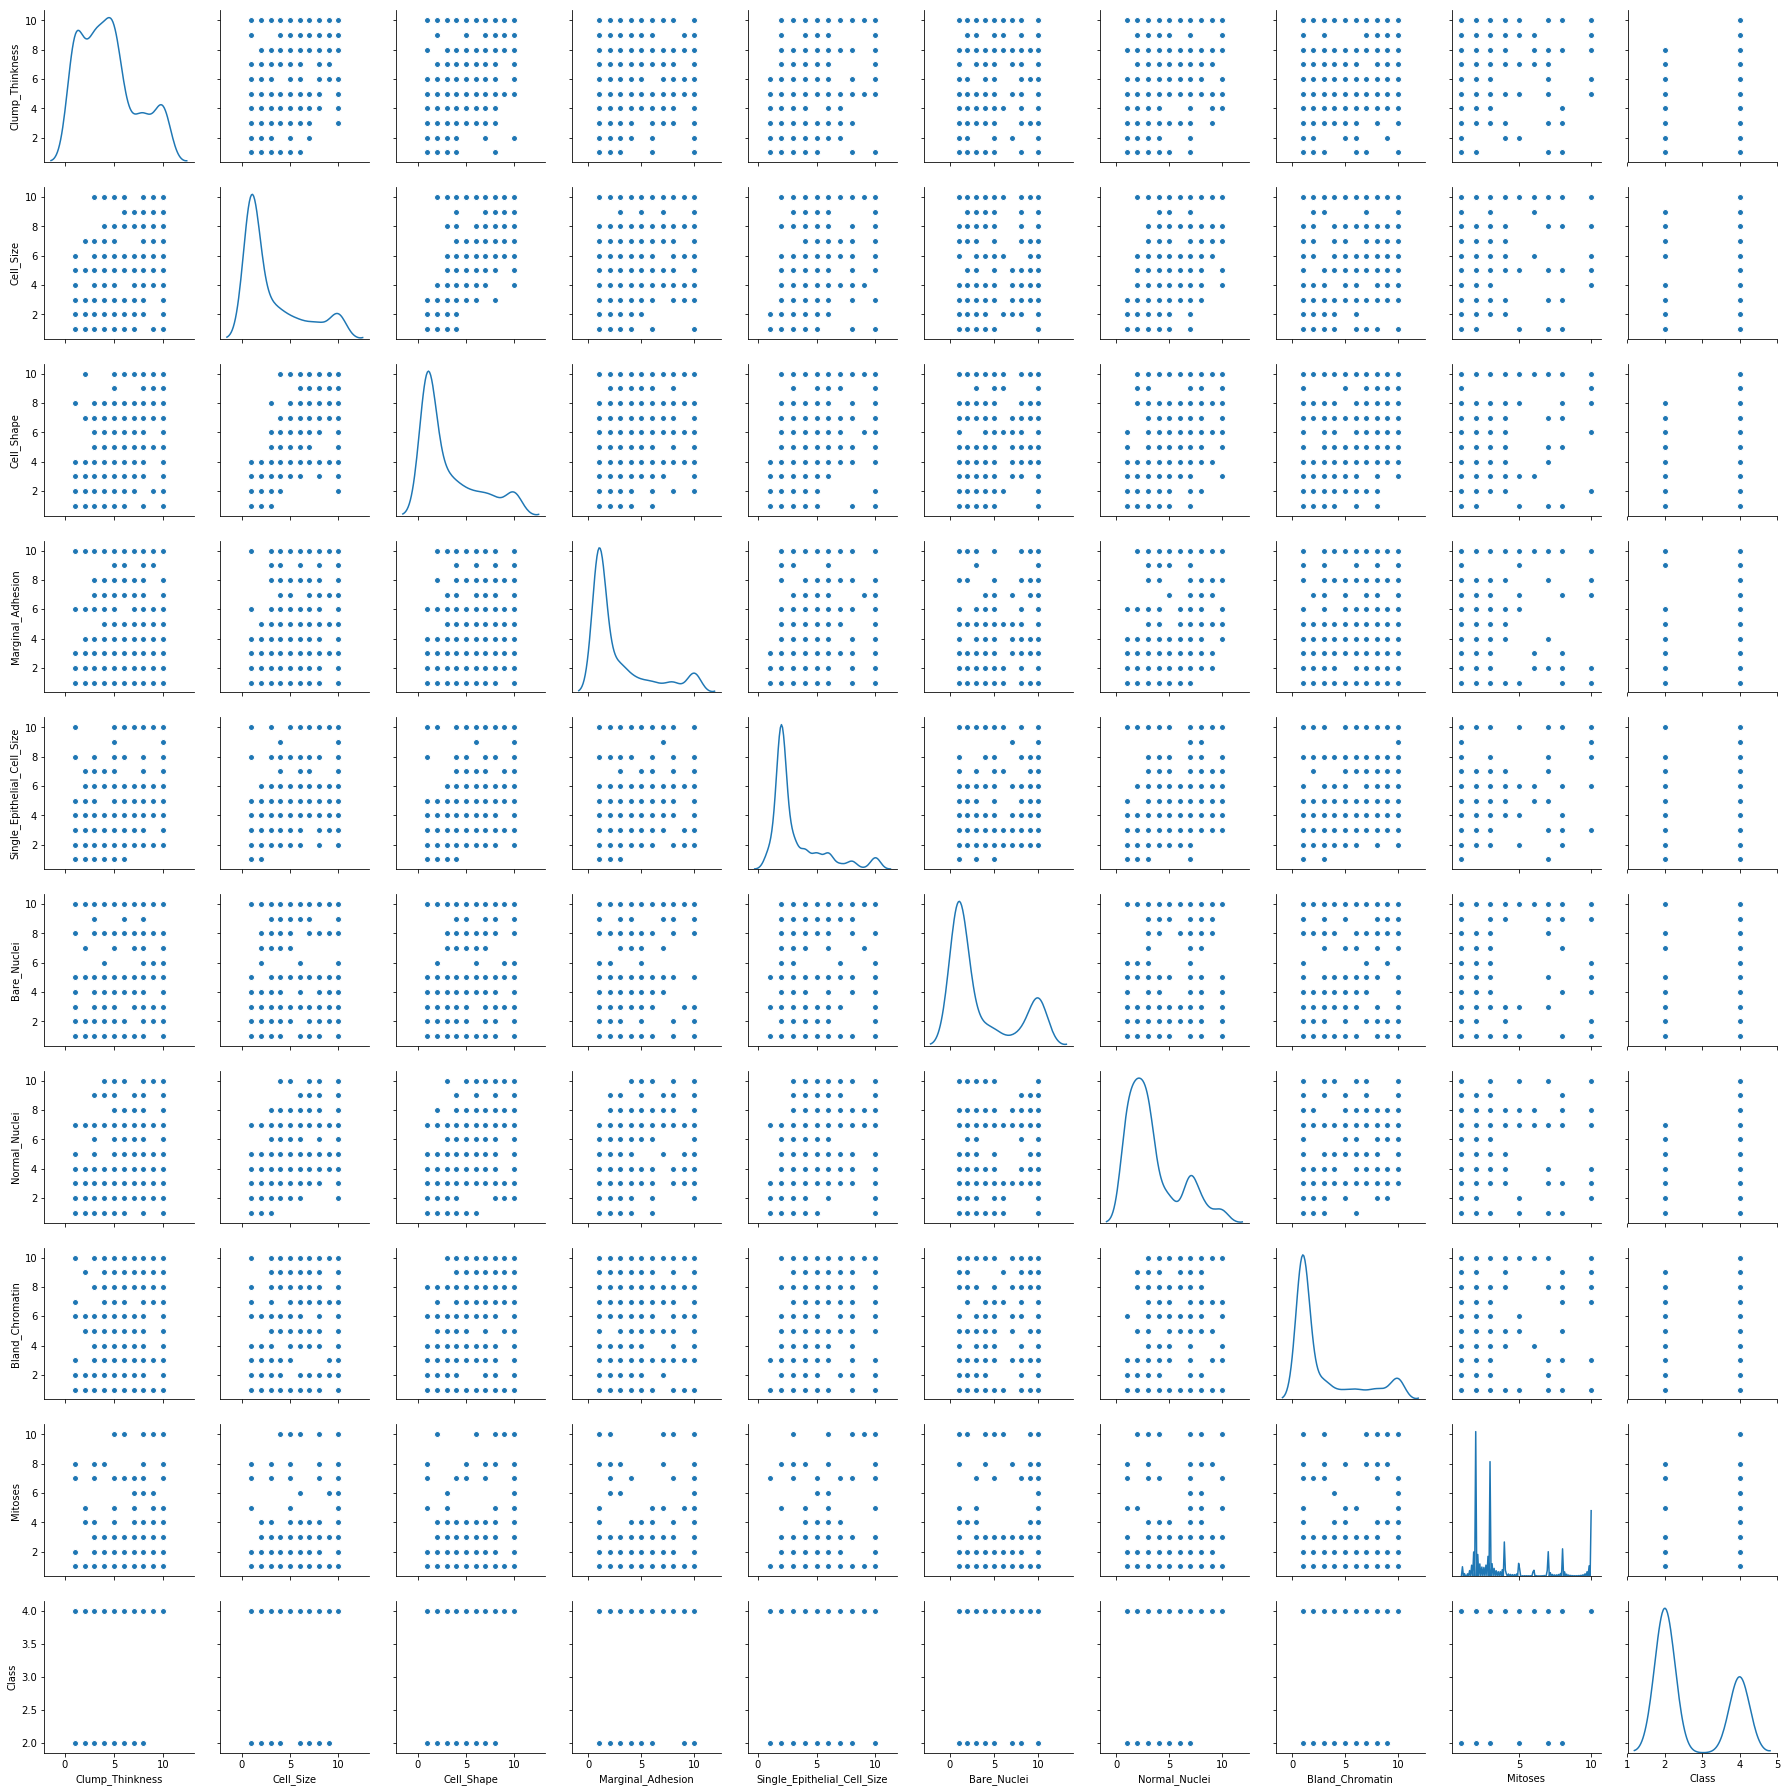

In [26]:
#Let us check for pair plots
sns.pairplot(data,diag_kind='kde')

In [0]:
# Relationship between variables shows some correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [51]:
data.drop('Class',axis=1,inplace=True)

In [57]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data))
data_scaled.head(5)

C:\Users\Shreyaspatil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shreyaspatil\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


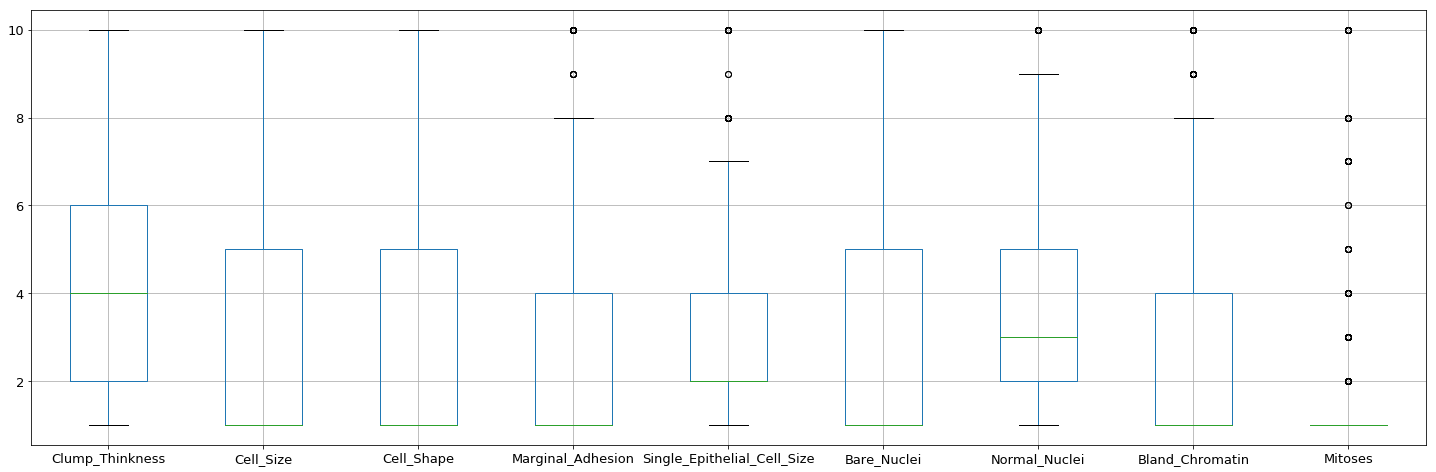

In [58]:
data.boxplot(figsize=(25,8),fontsize=13)

In [71]:
q1=data_scaled.quantile(0.25)
q3=data_scaled.quantile(0.75)
IQR=q3-q1
Max=q3+1.5*IQR
Min=q1-1.5*IQR

In [66]:
#Detection of outlier rows
outlier_rows={row for row in range(data_scaled.shape[0]) for col in range(data_scaled.shape[1]) \
              if(data_scaled.loc[row][col]>Max[col] or data_scaled.loc[row][col]<Min[col])}

In [67]:
len(outlier_rows)

195

<b>195 rows have outliers values

In [72]:
#Outlier Treatment
for row in outlier_rows:
    for col in range(data_scaled.shape[1]):
        if(data_scaled.loc[row][col]>Max[col]):
            data_scaled.loc[row][col]=Max[col]
        if(data_scaled.loc[row][col]<Min[col]):
            data_scaled.loc[row][col]=Min[col]

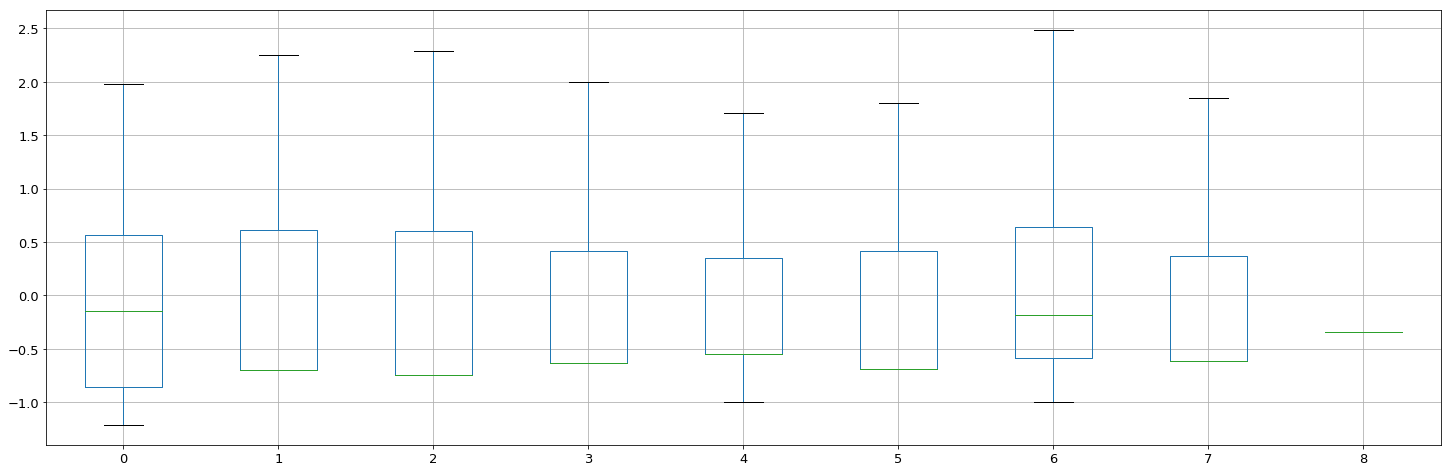

In [74]:
data_scaled.boxplot(figsize=(25,8),fontsize=13)

<b> Now there are no outliers

# Q6 Create a covariance matrix for identifying Principal components

In [96]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(data_scaled.T)
cov_matrix

array([[ 1.00143266e+00,  6.45836448e-01,  6.55526887e-01,
         4.49134391e-01,  4.41632248e-01,  5.90853495e-01,
         5.53623197e-01,  4.90142094e-01, -1.69525982e-33],
       [ 6.45836448e-01,  1.00143266e+00,  9.08181171e-01,
         6.46891055e-01,  6.30118417e-01,  6.87656572e-01,
         7.45493565e-01,  6.52131090e-01,  8.82947826e-34],
       [ 6.55526887e-01,  9.08181171e-01,  1.00143266e+00,
         6.24736638e-01,  6.06343815e-01,  7.08487339e-01,
         7.26128390e-01,  6.48408689e-01, -8.47629912e-34],
       [ 4.49134391e-01,  6.46891055e-01,  6.24736638e-01,
         8.07308003e-01,  4.73435490e-01,  6.10749303e-01,
         6.02824561e-01,  5.04358336e-01,  9.18265739e-34],
       [ 4.41632248e-01,  6.30118417e-01,  6.06343815e-01,
         4.73435490e-01,  6.44170325e-01,  5.04822927e-01,
         5.18966446e-01,  4.93134617e-01, -1.83653148e-33],
       [ 5.90853495e-01,  6.87656572e-01,  7.08487339e-01,
         6.10749303e-01,  5.04822927e-01,  1.001432

# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [113]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 3.29128960e-01  9.00256185e-01 -7.88729374e-04 -2.21651636e-03
   6.63616495e-02 -1.17513541e-01 -2.42008457e-01 -6.65281890e-02
   3.53701565e-33]
 [ 4.07552292e-01 -6.72150229e-02  7.39039362e-01 -2.88543304e-01
  -1.71826811e-01  2.54304762e-01  4.53411215e-02  3.22018122e-01
  -1.15638129e-32]
 [ 4.05261270e-01 -1.12934832e-02 -6.50724771e-01 -2.43593759e-01
  -3.76305135e-01  2.96967086e-01  1.83999583e-01  2.98670825e-01
   9.41732622e-33]
 [ 3.21553007e-01 -3.17278249e-01 -6.10788106e-02  2.76881608e-01
  -1.13287085e-01  1.55013498e-01 -8.09332649e-01 -1.53823424e-01
  -1.70274857e-33]
 [ 2.93215215e-01 -1.27719126e-01 -1.25283994e-01 -2.20867782e-01
   8.64085600e-01  2.80476886e-01  4.75316128e-02 -7.52565233e-02
   1.15913440e-32]
 [ 3.63593652e-01  5.69582714e-03  8.15949788e-02  7.60790280e-01
  -1.55202975e-02  1.78555231e-01  4.66842015e-01 -1.79564213e-01
  -1.80167623e-33]
 [ 3.69586596e-01 -2.12860579e-01 -5.68159428e-02  1.01596746e-01
   1.49966143e

# Q8 Find variance and cumulative variance by each eigen vector

In [114]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 71.79817263  78.91927924  84.63216987  88.75712446  92.55299907
  96.14895275  98.78044329 100.         100.        ]


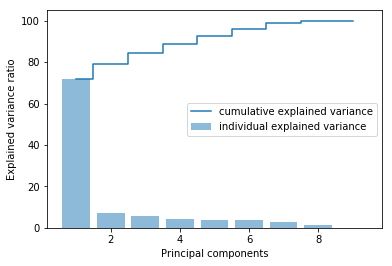

In [116]:
plt.bar(range(1,10), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [81]:
from sklearn.decomposition import PCA

In [125]:
pca=PCA(n_components=6)
data_scaled_new=pd.DataFrame(pca.fit_transform(data_scaled))
data_scaled_new.head(5)


,0,1,2,3,4,5
0,-1.342644,-0.607575,0.003129,-0.471450,0.146936,0.185057
1,1.590441,0.238421,-1.123944,1.279824,-0.315452,-0.235761
2,-1.476131,0.030755,-0.208648,-0.338587,0.144611,-0.115949
3,1.730614,-0.398182,1.452799,0.481269,-0.108564,-1.014994
4,-1.234229,-0.065232,-0.191735,-0.321031,0.062760,0.666335


# Q10 Find correlation between components and features

In [118]:
pca.components_

array([[ 3.29128960e-01,  4.07552292e-01,  4.05261270e-01,
         3.21553007e-01,  2.93215215e-01,  3.63593652e-01,
         3.69586596e-01,  3.21204709e-01,  1.70044189e-34],
       [-9.00256185e-01,  6.72150229e-02,  1.12934832e-02,
         3.17278249e-01,  1.27719126e-01, -5.69582714e-03,
         2.12860579e-01,  1.50245362e-01, -2.57661534e-33],
       [ 2.21651636e-03,  2.88543304e-01,  2.43593759e-01,
        -2.76881608e-01,  2.20867782e-01, -7.60790280e-01,
        -1.01596746e-01,  3.77928802e-01,  5.06997168e-29],
       [-1.17513541e-01,  2.54304762e-01,  2.96967086e-01,
         1.55013498e-01,  2.80476886e-01,  1.78555231e-01,
        -7.85153559e-01, -2.86854766e-01,  4.51888791e-29],
       [-6.65281890e-02,  3.22018122e-01,  2.98670825e-01,
        -1.53823424e-01, -7.52565233e-02, -1.79564213e-01,
         4.06400153e-01, -7.58910065e-01, -2.46646433e-28],
       [ 2.42008457e-01, -4.53411215e-02, -1.83999583e-01,
         8.09332649e-01, -4.75316128e-02, -4.668420

In [121]:
df=pd.DataFrame(pca.components_,columns=['Clump_Thinkness','Cell_Size','Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Normal_Nuclei','Bland_Chromatin','Mitoses'])
df

,Clump_Thinkness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nuclei,Bland_Chromatin,Mitoses
0,0.329129,0.407552,0.405261,0.321553,0.293215,0.363594,0.369587,0.321205,1.700442e-34
1,-0.900256,0.067215,0.011293,0.317278,0.127719,-0.005696,0.212861,0.150245,-2.576615e-33
2,0.002217,0.288543,0.243594,-0.276882,0.220868,-0.760790,-0.101597,0.377929,5.069972e-29
3,-0.117514,0.254305,0.296967,0.155013,0.280477,0.178555,-0.785154,-0.286855,4.518888e-29
4,-0.066528,0.322018,0.298671,-0.153823,-0.075257,-0.179564,0.406400,-0.758910,-2.466464e-28
5,0.242008,-0.045341,-0.184000,0.809333,-0.047532,-0.466842,-0.020716,-0.172832,-4.963229e-29


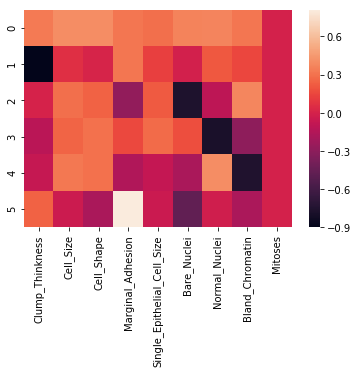

In [122]:
sns.heatmap(df)

# Content Based Recommendation System

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [129]:
data_jokes=pd.read_csv('jokes.csv')
data_jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [140]:
ratings=pd.DataFrame(data_jokes.iloc[:200,1:])
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [141]:
ratings.columns=range(100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [142]:
ratings.replace(99.00,0,inplace=True)

In [143]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [149]:
ratings_diff=scaler.fit_transform(ratings)
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [154]:
mean=ratings_diff.mean(axis=0)
mean

array([ 0.00000000e+00,  1.77635684e-17, -2.88657986e-17, -1.33226763e-17,
       -2.22044605e-18, -6.66133815e-18,  6.66133815e-18,  1.66533454e-17,
       -5.32907052e-17,  8.88178420e-18, -3.55271368e-17, -4.44089210e-17,
       -8.88178420e-18,  3.55271368e-17, -8.88178420e-18, -1.19904087e-16,
        1.99840144e-17,  2.55351296e-17,  8.88178420e-18,  2.66453526e-17,
        1.11022302e-16, -1.77635684e-17, -2.66453526e-17,  4.44089210e-17,
       -1.33226763e-17, -5.32907052e-17, -1.77635684e-17,  8.88178420e-18,
        0.00000000e+00,  0.00000000e+00,  3.55271368e-17, -1.06581410e-16,
        4.44089210e-18,  4.44089210e-18, -8.88178420e-18,  1.77635684e-17,
        1.77635684e-17, -2.22044605e-17, -1.77635684e-17,  1.11022302e-17,
        0.00000000e+00,  1.33226763e-17,  3.10862447e-17, -2.66453526e-17,
        8.88178420e-18, -1.33226763e-17, -1.77635684e-17,  7.77156117e-17,
       -1.77635684e-17,  7.10542736e-17, -8.88178420e-18, -8.88178420e-18,
       -4.44089210e-18,  

In [153]:
sorted=mean.argsort()[:-10:-1]
sorted

array([53, 20, 47, 49, 64, 99, 83, 23, 73], dtype=int64)